In [114]:
import quandl as qn
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard
import warnings
warnings.filterwarnings("ignore")

qn.ApiConfig.api_key = "HQV7bdPFvAn1QUxxkN5c"
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [115]:
Data=[]
Companies=["EOD/GOOGL","EOD/FB","EOD/AAPL","EOD/AMZN"]#,"EOD/MSFT"]
InitDate="2012-05-20"
EndDate="2017-01-01"
for company in Companies:
    data=qn.get(company, start_date=InitDate, end_date=EndDate,collapse="daily", transformation='rdiff')
    Data.append(data['Close'])

(468, -0.49652013038498999)
(294, 0.29607695209355001)
(513, -0.85485694812335999)


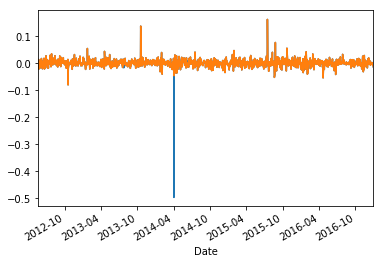

In [116]:
## Cleaning the outliers ## 
def outliers(A,nTh,pTh):  ## MrD is threshhold
    List=[]
    for i in range(len(A)):
        for j in range(len(A[i])):
            if nTh<=A[i][j]<=pTh:
                continue 
            else:
                print (j,A[i][j])
                List.append((i,j))
#    return List 
    for (x,y) in List:
        for i in range(len(A)):
            A[i][y]=(A[i][y-1]+A[i][y+1])/2.0
#    return List

Outliers=[]
Data_NO=copy.deepcopy(Data) ## Without outliers ## Data_NO
Data[0].plot()
#plt.show()
outliers(Data_NO,-0.2,0.2)
Data_NO[0].plot()
plt.show()

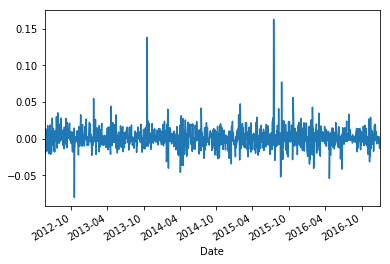

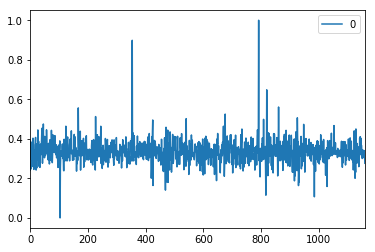

In [117]:
scaler = MinMaxScaler()
serries_scaled=[]
sData=[]
for i in range(len(Data_NO)):
    data=pd.DataFrame(scaler.fit_transform(Data_NO[i]))#, columns=Data_NO[i].columns)
    sData.append(data)

Data_NO[0].plot()
sData[0].plot()
plt.show()    
#df_sGoogle = pd.DataFrame(scaler.fit_transform(df_google), columns=df_google.columns)
#df_sFb = pd.DataFrame(scaler.fit_transform(df_fb), columns=df_fb.columns)
#df_sApple = pd.DataFrame(scaler.fit_transform(df_apple), columns=df_apple.columns)
#df_sMic = pd.DataFrame(scaler.fit_transform(df_mic), columns=df_mic.columns)
#df_sAmz = pd.DataFrame(scaler.fit_transform(df_amz), columns=df_amz.columns)

In [122]:
combined=np.column_stack((sData[i] for i in range(len(sData))))#,df_fb,df_apple, df_amz))#print combined

In [123]:
#combined=combined[:].ravel()
print combined.shape[:]

(1161, 4)


In [136]:
# Sliding over time series # 
# Making Image data #
scan=(20,4)
#scan=(20,2)
stride=(1,0)
InputMatrices=sliding_window(combined,scan,stride)
print InputMatrices.shape[:]
#print InputMatrices[0]
matrices=InputMatrices.reshape(1142,80)
print matrices.shape[:]
#print matrices[0]

(1142, 20, 4)
(1142, 80)


In [137]:
# this is the size of our encoded representations
encoding_dim = 10  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
(x,y)=scan
inputSize=x*y
input_img = Input(shape=(x*y,))
#print input_img
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu' )(input_img)
#print encoded.shape[1:]
decoded = Dense(inputSize, activation='sigmoid')(encoded)

In [138]:
## Start compiling CNN autoencoders 
autoencoder = Model(input_img, decoded)
encoder=Model(input_img, encoded)
L=len(autoencoder.layers)

In [139]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [141]:
autoencoder.fit(matrices, matrices,
                epochs=200,
                batch_size=20,
                shuffle=False,
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/200
1142/1142 [==============================] - 0s - loss: 0.6647     
Epoch 2/200
1142/1142 [==============================] - 0s - loss: 0.6647     
Epoch 3/200
1142/1142 [==============================] - 0s - loss: 0.6647     
Epoch 4/200
1142/1142 [==============================] - 0s - loss: 0.6647     
Epoch 5/200
1142/1142 [==============================] - 0s - loss: 0.6647     
Epoch 6/200
1142/1142 [==============================] - 0s - loss: 0.6647     
Epoch 7/200
1142/1142 [==============================] - 0s - loss: 0.6647     
Epoch 8/200
1142/1142 [==============================] - 0s - loss: 0.6647     
Epoch 9/200
1142/1142 [==============================] - 0s - loss: 0.6647     
Epoch 10/200
1142/1142 [==============================] - 0s - loss: 0.6647     
Epoch 11/200
1142/1142 [==============================] - 0s - loss: 0.6647     
Epoch 12/200
1142/1142 [==============================] - 0s - loss: 0.6647     
Epoch 13/200
1142/1142 [=============

1142/1142 [==============================] - 0s - loss: 0.6644     
Epoch 103/200
1142/1142 [==============================] - 0s - loss: 0.6644     
Epoch 104/200
1142/1142 [==============================] - 0s - loss: 0.6644     
Epoch 105/200
1142/1142 [==============================] - 0s - loss: 0.6644     
Epoch 106/200
1142/1142 [==============================] - 0s - loss: 0.6644     
Epoch 107/200
1142/1142 [==============================] - 0s - loss: 0.6644     
Epoch 108/200
1142/1142 [==============================] - 0s - loss: 0.6644     
Epoch 109/200
1142/1142 [==============================] - 0s - loss: 0.6644     
Epoch 110/200
1142/1142 [==============================] - 0s - loss: 0.6644     
Epoch 111/200
1142/1142 [==============================] - 0s - loss: 0.6644     
Epoch 112/200
1142/1142 [==============================] - 0s - loss: 0.6644     
Epoch 113/200
1142/1142 [==============================] - 0s - loss: 0.6644     
Epoch 114/200
1142/1142 [=====

In [143]:
dec_imgs=autoencoder.predict(matrices)
enc_imgs=encoder.predict(matrices)

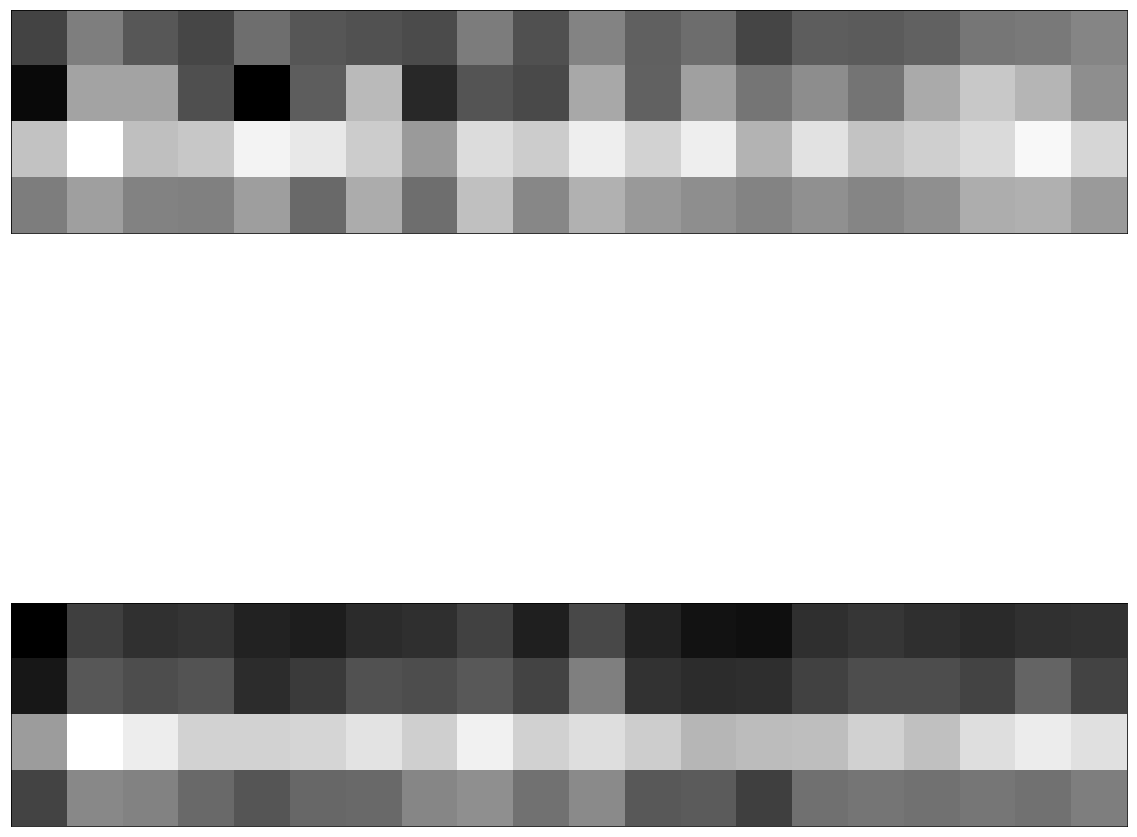

In [155]:
plt.clf()
plt.figure(figsize=(20, 20))
n=1
for i in range(n):
    ax=plt.subplot(2, n, i+1)
#    print matrices[i].shape[:]
    xtest=matrices[i].reshape(20,4).T
    plt.imshow(xtest)
    plt.gray()
    ax.get_xaxis().set_visible(False)    
    ax.get_yaxis().set_visible(False)        
    ax1=plt.subplot(2, n, n+i+1)    
    img=dec_imgs[i].reshape(20,4).T
    plt.imshow(img)    
#    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)    
    diff=(xtest-img)/(xtest)
    #plt.imshow(diff)    
#    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)    
    
plt.show()

(1142, 80)


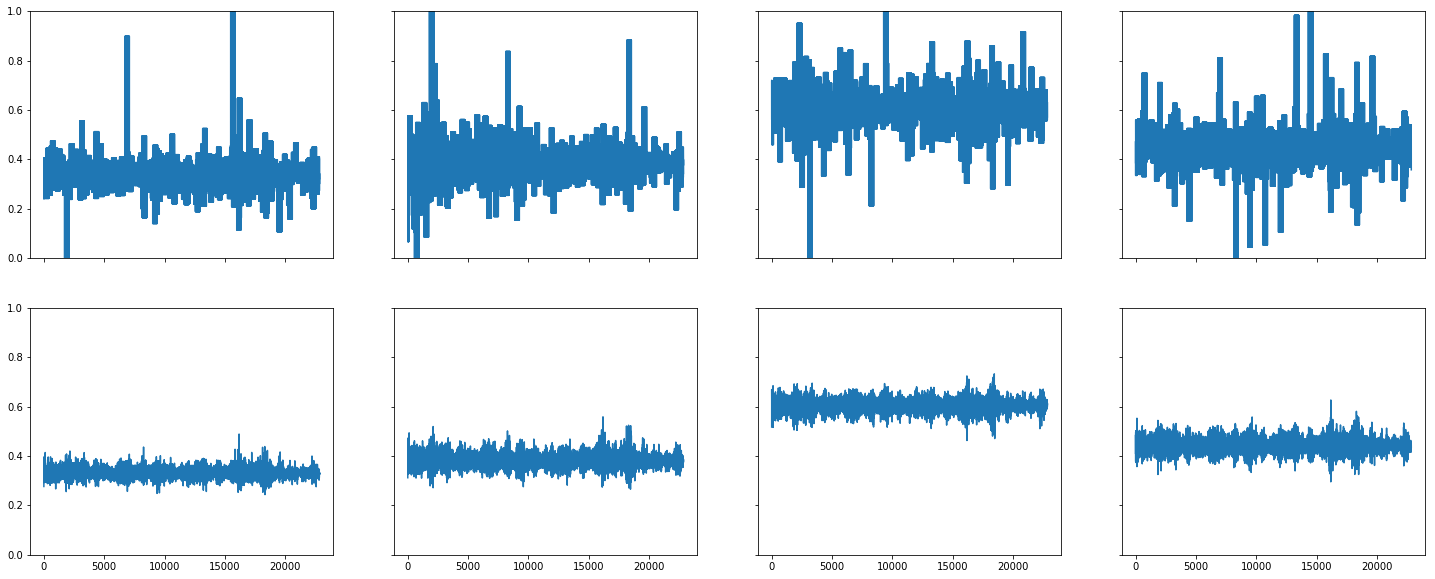

In [153]:
nCompanies=4
print matrices.shape[:]
def reconTSeries(Imgs, nImgs, nDays, cIndex):
    l1=[]
    for i in range(0,nImgs):
        for j in range(0,nDays):
            l1.append(Imgs[i][j*nCompanies+cIndex])
    return l1

def checkTSeries(Imgs, nImgs, nDays, cIndex):
    l1=[]
    for i in range(0,nImgs):
        for j in range(0,nDays):
            if Imgs[i][nDays*nCompanies+cIndex] > 0.5:
                l1.append(Imgs[i][j*nCompanies+cIndex])
    return l1


'''
oTime=reconTSeries(matrices, 58, 20, 1)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()


oTime=reconTSeries(dec_imgs, 58, 20, 1)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

'''
'''
plt.clf()
oTime=reconTSeries(matrices, 58, 20, 0)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

oTime=reconTSeries(dec_imgs, 58, 20, 0)
#print oTime 
#print checkTSeries(dec_imgs, 58, 20, 0)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

plt.show()

plt.clf()

plt.clf()
oTime=reconTSeries(matrices, 58, 20, 1)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

oTime=reconTSeries(dec_imgs, 58, 20, 1)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

plt.show()



plt.clf()
oTime=reconTSeries(matrices, 58, 20, 2)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

oTime=reconTSeries(dec_imgs, 58, 20, 2)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

plt.show()


plt.clf()
oTime=reconTSeries(matrices, 58, 20, 3)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

oTime=reconTSeries(dec_imgs, 58, 20, 3)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

plt.show()
'''

plt.clf()


oTime=[]
#plt.figure(figsize=(10, 10))
f, axes = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(25,10))
#f.set_figheight(20)
#f.set_figwidth(20)
axes[0,0].set_ylim(0,1)
axes[0,1].set_ylim(0,1)
axes[0,2].set_ylim(0,1)
axes[0,3].set_ylim(0,1)
axes[1,0].set_ylim(0,1)
axes[1,1].set_ylim(0,1)
axes[1,2].set_ylim(0,1)
axes[1,3].set_ylim(0,1)

nImages=1142
oTime=reconTSeries(matrices, nImages, 20, 0)

timeSeries=pd.DataFrame(oTime)
axes[0,0].plot(timeSeries)

oTime=reconTSeries(matrices, nImages, 20, 1)
timeSeries=pd.DataFrame(oTime)
axes[0,1].plot(timeSeries)

oTime=reconTSeries(matrices, nImages, 20, 2)
timeSeries=pd.DataFrame(oTime)
axes[0,2].plot(timeSeries)

oTime=reconTSeries(matrices, nImages, 20, 3)
timeSeries=pd.DataFrame(oTime)
axes[0,3].plot(timeSeries)


oTime=reconTSeries(dec_imgs, nImages, 20, 0)
timeSeries=pd.DataFrame(oTime)
axes[1,0].plot(timeSeries)

oTime=reconTSeries(dec_imgs, nImages, 20, 1)
timeSeries=pd.DataFrame(oTime)
axes[1,1].plot(timeSeries)

oTime=reconTSeries(dec_imgs, nImages, 20, 2)
timeSeries=pd.DataFrame(oTime)
axes[1,2].plot(timeSeries)

oTime=reconTSeries(dec_imgs, nImages, 20, 3)
timeSeries=pd.DataFrame(oTime)
axes[1,3].plot(timeSeries)


plt.show()